# Exercise 1 : Warm-up LP-problem
A company produces two types of television sets, a cheap type A and an expensive type B.

- Profit: 700 per unit for type A, 100 per unit type B.
- Stage I: 3 hours for A, 5 hours for B, 3900 hours available.
- Stage II: 1 hour for A, 3 hours for B, 2100 hours available.
- Stage III: 2 hours for A, 2 hours for B, 2200 hours available.


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

## i) Define the model with decision variables x1, x2 and create A, b, c.

In [2]:
# Decision variables: x1 = number of type A TVs, x2 = number of type B TVs
# Objective: maximize z = 700*x1 + 1000*x2
c = np.array([700, 1000])

# Constraints:
# Stage I:   3*x1 + 5*x2 <= 3900
# Stage II:  1*x1 + 3*x2 <= 2100
# Stage III: 2*x1 + 2*x2 <= 2200
# x1, x2 >= 0
A = np.array([[3, 5], [1, 3], [2, 2]])  # Stage I  # Stage II  # Stage III
b = np.array([3900, 2100, 2200])

print("\ni) Model definition:")
print(f"Objective coefficients c = {c}")
print(f"Constraint matrix A =\n{A}")
print(f"Right-hand side b = {b}")


i) Model definition:
Objective coefficients c = [ 700 1000]
Constraint matrix A =
[[3 5]
 [1 3]
 [2 2]]
Right-hand side b = [3900 2100 2200]


## ii) Plot the feasible region.

Saved: img/ex1_feasible_region.png


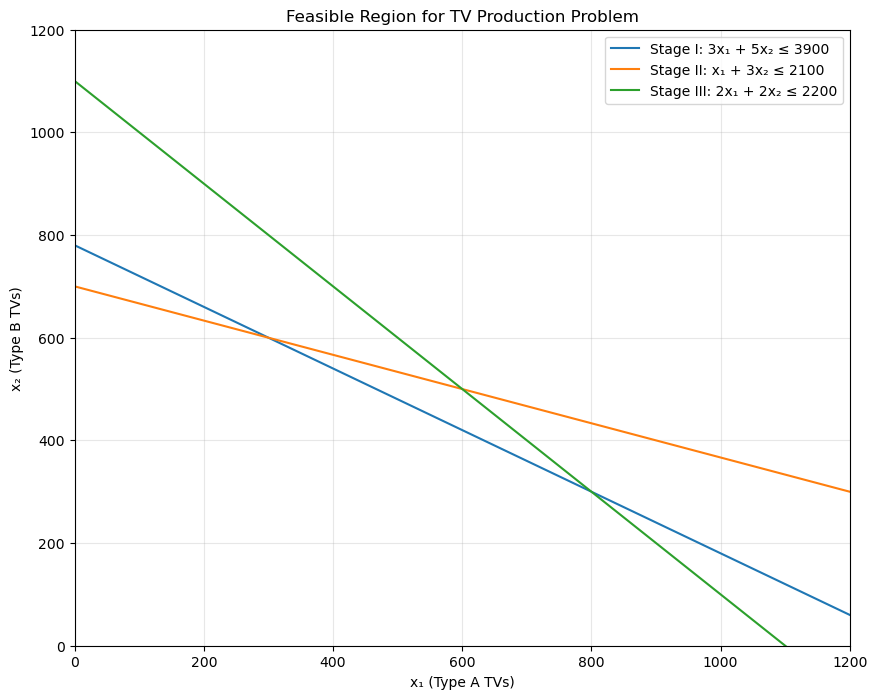

In [3]:
x = np.linspace(0, 1200, 100)

# Reformulate each line equation as y_i = (b_i - a_i,1 * x) / a_i,2
y1 = (b[0] - A[0, 0] * x) / A[0, 1]  # Stage I
y2 = (b[1] - A[1, 0] * x) / A[1, 1]  # Stage II
y3 = (b[2] - A[2, 0] * x) / A[2, 1]  # Stage III

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="Stage I: 3x₁ + 5x₂ ≤ 3900")
plt.plot(x, y2, label="Stage II: x₁ + 3x₂ ≤ 2100")
plt.plot(x, y3, label="Stage III: 2x₁ + 2x₂ ≤ 2200")
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(x=0, color="black", linestyle="--", linewidth=0.5)

plt.xlim(0, 1200)
plt.ylim(0, 1200)
plt.xlabel("x₁ (Type A TVs)")
plt.ylabel("x₂ (Type B TVs)")
plt.title("Feasible Region for TV Production Problem")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("img/ex1_feasible_region.png", dpi=300, bbox_inches="tight")
print("Saved: img/ex1_feasible_region.png")

## iii) Identify the five vertices that enclose the feasible region.

In [4]:
vertices = []

# Vertex 1: Origin
vertices.append(np.array([0, 0]))

# Vertex 2: x2 = 0 and Stage III constraint (most restrictive on x1-axis)
# 2x1 = 2200 => x1 = 1100
vertices.append(np.array([1100, 0]))

# Vertex 3: Stage III and Stage I intersection
# 2x1 + 2x2 = 2200
# 3x1 + 5x2 = 3900
# From first: x1 = 1100 - x2
# Substitute: 3(1100 - x2) + 5x2 = 3900
# 3300 - 3x2 + 5x2 = 3900
# 2x2 = 600, x2 = 300
# x1 = 1100 - 300 = 800
vertices.append(np.array([800, 300]))

# Vertex 4: Stage I and Stage II intersection
# 3x1 + 5x2 = 3900
# x1 + 3x2 = 2100
# From second: x1 = 2100 - 3x2
# Substitute: 3(2100 - 3x2) + 5x2 = 3900
# 6300 - 9x2 + 5x2 = 3900
# -4x2 = -2400, x2 = 600
# x1 = 2100 - 1800 = 300
vertices.append(np.array([300, 600]))

# Vertex 5: x1 = 0 and Stage II constraint (most restrictive on x2-axis)
# 3x2 = 2100 => x2 = 700
vertices.append(np.array([0, 700]))

print("Vertices:")
for i, v in enumerate(vertices):
    print(f"  v{i+1} = {v}")

Vertices:
  v1 = [0 0]
  v2 = [1100    0]
  v3 = [800 300]
  v4 = [300 600]
  v5 = [  0 700]


## iv) Add level curves to convex hull plot.

Saved: img/ex1_level_curves.png


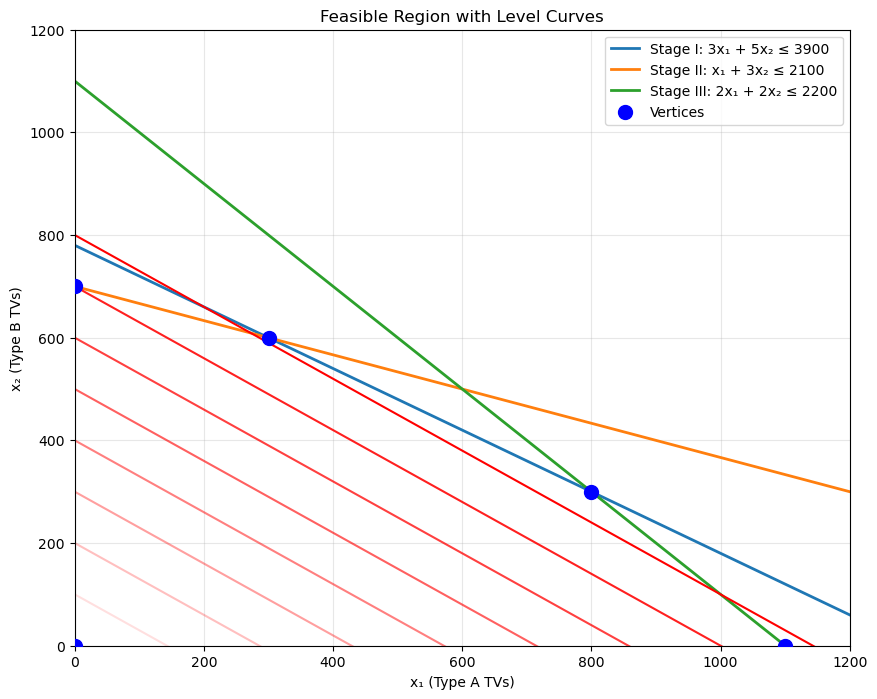

In [5]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="Stage I: 3x₁ + 5x₂ ≤ 3900", linewidth=2)
plt.plot(x, y2, label="Stage II: x₁ + 3x₂ ≤ 2100", linewidth=2)
plt.plot(x, y3, label="Stage III: 2x₁ + 2x₂ ≤ 2200", linewidth=2)
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(x=0, color="black", linestyle="--", linewidth=0.5)

# Plot vertices
vertices_array = np.array(vertices)
plt.scatter(
    vertices_array[:, 0],
    vertices_array[:, 1],
    color="blue",
    s=100,
    zorder=5,
    label="Vertices",
)

# Add level curves for z = c^T x = 700*x1 + 1000*x2
# For a given z = k, we have x2 = (k - 700*x1) / 1000
for k in range(1, 9):
    z_value = k * 10**5
    y_level = (z_value - c[0] * x) / c[1]
    plt.plot(x, y_level, "r", alpha=k / 8, linewidth=1.5)

plt.xlim(0, 1200)
plt.ylim(0, 1200)
plt.xlabel("x₁ (Type A TVs)")
plt.ylabel("x₂ (Type B TVs)")
plt.title("Feasible Region with Level Curves")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("img/ex1_level_curves.png", dpi=300, bbox_inches="tight")
print("Saved: img/ex1_level_curves.png")

## v) Verify by checking the value of z in all extreme points.

In [6]:
print("\nv) Objective function values at vertices:")

max_z = -np.inf
max_vertex = None
for i, v in enumerate(vertices):
    z_value = c @ v
    print(f"  z(v{i+1}) = z({v}) = {z_value}")
    if z_value > max_z:
        max_z = z_value
        max_vertex = v

print(f"\nMaximum occurs at vertex {max_vertex} with z = {max_z}")


v) Objective function values at vertices:
  z(v1) = z([0 0]) = 0
  z(v2) = z([1100    0]) = 770000
  z(v3) = z([800 300]) = 860000
  z(v4) = z([300 600]) = 810000
  z(v5) = z([  0 700]) = 700000

Maximum occurs at vertex [800 300] with z = 860000


## vi) Use `scipy.optimize.linprog` to find the maximum.

In [7]:
print("\nvi) Using scipy linprog to find maximum:")

# linprog minimizes, so we minimize -c^T x to maximize c^T x
result = linprog(-c, A_ub=A, b_ub=b, bounds=[(0, None), (0, None)], method="highs")

if result.success:
    print(f"  Optimal solution: x = {result.x}")
    print(f"  Maximum value: z = {-result.fun}")
else:
    print(f"  Optimization failed: {result.message}")


vi) Using scipy linprog to find maximum:
  Optimal solution: x = [800. 300.]
  Maximum value: z = 860000.0


## vii) Setup the problem in standard form (equality constraints with slack variables).

In [8]:
print("\nvii) Solving in standard form with slack variables:")

# Standard form: minimize c^T x subject to Ax = b, x >= 0
# Add slack variables s1, s2, s3 for each inequality constraint
# 3x1 + 5x2 + s1 = 3900
# x1 + 3x2 + s2 = 2100
# 2x1 + 2x2 + s3 = 2200

# New variables: [x1, x2, s1, s2, s3]
c_standard = np.array([-700, -1000, 0, 0, 0])  # Negative because we're minimizing
A_eq_standard = np.array(
    [
        [3, 5, 1, 0, 0],  # Stage I
        [1, 3, 0, 1, 0],  # Stage II
        [2, 2, 0, 0, 1],  # Stage III
    ]
)
b_eq_standard = b

result_standard = linprog(
    c_standard,
    A_eq=A_eq_standard,
    b_eq=b_eq_standard,
    bounds=[(0, None)] * 5,
    method="highs",
)

if result_standard.success:
    x_optimal = result_standard.x[:2]
    slack = result_standard.x[2:]
    print(f"  Optimal solution: x = {x_optimal}")
    print(f"  Slack variables: s = {slack}")
    print(f"  Maximum value: z = {-result_standard.fun}")
    print("  Verification: Both methods give the same result!")
else:
    print(f"  Optimization failed: {result_standard.message}")


vii) Solving in standard form with slack variables:
  Optimal solution: x = [800. 300.]
  Slack variables: s = [  0. 400.   0.]
  Maximum value: z = 860000.0
  Verification: Both methods give the same result!
